# Import Libraries

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

The YOLOv8 algorithm uses a specific format for labeling data in a text file. The format is as follows:

Each line in the text file represents a single object in an image and contains the following information separated by spaces:

Object Class: This is a numerical value representing the class or category of the object. Each class is assigned a unique integer starting from 0. For example, if there are three classes (car, person, and dog), they might be assigned values 0, 1, and 2, respectively.

Object Center: This refers to the coordinates of the object's center in the image. The coordinates are specified as normalized values relative to the width and height of the image. The center coordinates are represented as (x, y), where 'x' and 'y' are floating-point values ranging from 0 to 1. The (0,0) coordinates represent the top-left corner of the image, while (1,1) represents the bottom-right corner.

Object Width and Height: These values represent the width and height of the object's bounding box in the image, also normalized relative to the width and height of the image. The width and height are represented as floating-point values ranging from 0 to 1.

If there are multiple objects in one image, each object will be represented by a separate line in the YOLOv8 text file. Each line will follow the same format as described earlier, containing the object class, object center coordinates, and object width and height.


Here's an example of a YOLOv8 text file with multiple objects: <br>
0 0.482 0.618 0.326 0.718 <br>
1 0.712 0.375 0.234 0.511 <br>
2 0.162 0.826 0.480 0.645 <br>


In this example, there are three objects in the image:

The first object belongs to class 0 and has the center coordinates (0.482, 0.618) and a bounding box size of 0.326 (width) and 0.718 (height).

The second object belongs to class 1 and has the center coordinates (0.712, 0.375) and a bounding box size of 0.234 (width) and 0.511 (height).

The third object belongs to class 2 and has the center coordinates (0.162, 0.826) and a bounding box size of 0.480 (width) and 0.645 (height).

Each line in the text file corresponds to one object, allowing YOLOv8 to learn and detect multiple objects within the same image during training.

Typically, the label file is named the same as the corresponding image file, but with a different extension. <br> For example, if the image file is named "image.jpg" or "image.png", the label file could be named "image.txt" or "image.labels". This convention helps to establish a clear association between the image and its corresponding label file.

# Identifying Labels

In [ ]:
# Path to the directory containing the images
path = r'C:\\Users\\shirs\\Desktop\\Object Detection\\IITM-HeTra_v2 Dataset-2\\xmls_train\\'

# Reading the filenames from the directory
filenames = os.listdir(path)

# Printing the filenames
print(filenames)

# # Read xml file
start = '<object><name>'
end = '</name>'
classes = np.array([])
for filename in tqdm(filenames):
    with open( path + filename, 'r') as f:
        data = f.read().split(start)[1:]
        temp = [ d.split(end)[0] for d in data ]
        classes = np.append(classes,np.unique(temp))

classes = np.unique(classes)
labels = {}
for i in range(len(classes)):
    labels[classes[i]] = i

print("labels : " , labels)

# Extract the Coordinates and label

In [ ]:
def extract_write_data(path_xml, path_label, path_image, filename,labels):
    # Read xml file
    with open( path_xml + filename, 'r') as f:
        data = f.read().split(start)[1:]
    # Read image
    image = cv2.imread(path_image + filename[:-4] + '.jpg')
    width = image.shape[1]
    height = image.shape[0]
    # print(width,height)
    # Extract data
    for i in range(len(data)):
        temp = data[i]
        object = temp.split('</name>')[0]
        object_id = labels[object]
        temp = temp.split('<xmin>')[1]
        xmin = float(temp.split('</xmin>')[0])
        temp = temp.split('</xmin>')[1]
        temp = temp.split('<ymin>')[1]
        ymin = float(temp.split('</ymin>')[0])
        temp = temp.split('</ymin>')[1]
        temp = temp.split('<xmax>')[1]
        xmax = float(temp.split('</xmax>')[0])
        temp = temp.split('</xmax>')[1]
        temp = temp.split('<ymax>')[1]
        ymax = float(temp.split('</ymax>')[0])

        # Scale the values
        xmin = xmin/width
        xmax = xmax/width
        ymin = ymin/height
        ymax = ymax/height
        
        x_center = (xmin + xmax)/2
        y_center = (ymin + ymax)/2

        box_width = xmax - xmin
        box_height = ymax - ymin

        # write to text file
        with open(path_label+filename[:-4]+'.txt', 'a') as f:
            f.write(str(object_id) + ' ' + str(x_center) + ' ' + str(y_center) + ' ' + str(box_width) + ' ' + str(box_height) + '\n')

        # print(object_id,xmin,xmax,ymin,ymax)
    return None

# extract_write_data(path, filenames[0],labels)

In [ ]:
path_xml = r'C:\\Users\\shirs\\Desktop\\Object Detection\\IITM-HeTra_v2 Dataset-2\\xmls_train\\'
path_label = r"C:\\Users\\shirs\\Desktop\\Object Detection\\IITM-HeTra_v2 Dataset-2\\train\\labels\\"
path_image = r"C:\\Users\\shirs\\Desktop\\Object Detection\\IITM-HeTra_v2 Dataset-2\\train\\images\\"

filenames = os.listdir(path_xml)
for filename in tqdm(filenames):
    extract_write_data(path_xml, path_label, path_image, filename,labels)

path_xml = r'C:\\Users\\shirs\\Desktop\\Object Detection\\IITM-HeTra_v2 Dataset-2\\xmls_valid\\'
path_label = r"C:\\Users\\shirs\\Desktop\\Object Detection\\IITM-HeTra_v2 Dataset-2\\valid\\labels\\"
path_image = r"C:\\Users\\shirs\\Desktop\\Object Detection\\IITM-HeTra_v2 Dataset-2\\valid\\images\\"

filenames = os.listdir(path_xml)
for filename in tqdm(filenames):
    extract_write_data(path_xml, path_label, path_image, filename,labels)

# Training Custom YOLOv8 Model

In [ ]:
from ultralytics import YOLO
model = YOLO()
model.train(data="data.yaml",epochs=50,patience=10)

In [ ]:
from ultralytics import YOLO
!yolo task=detect mode=val model="C:/Users/SK_IN/OneDrive/Desktop/Shirsh/Object Detection/IITM-HeTra_v2 Dataset-2/runs/detect/train/weights/best.pt" data=data.yaml

In [1]:
from ultralytics import YOLO
from flask import Flask, render_template, request
import os
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
flask_app_folder_path = r"C:\Users\shirs\Desktop\Object Detection\IITM-HeTra_v2 Dataset-2\flask_app"
flask_app_folder_path

'C:\\Users\\shirs\\Desktop\\Object Detection\\IITM-HeTra_v2 Dataset-2\\flask_app'

In [7]:
yolo = YOLO(flask_app_folder_path+"/best.pt") # last.pt
yolo

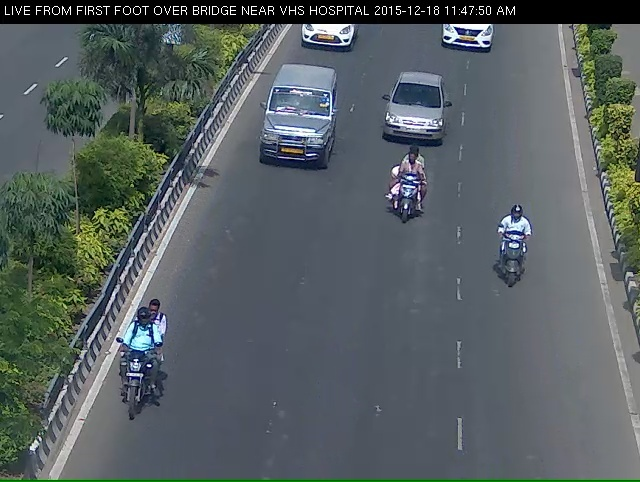

In [8]:
image = Image.open(r"C:\Users\shirs\Desktop\uploaded_images\frame_0.jpg")
image

In [17]:
results = yolo.predict(image, save=True)

for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs


0: 512x640 4 Cars, 3 Persons, 246.2ms
Speed: 8.1ms preprocess, 246.2ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs\detect\predict
